<center><h1>Parkinson disease diagnostic using time series data</h1></center>
<center><h2>Exploratory data analysis</h2></center>

# Importation of librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.signal import spectrogram
warnings.filterwarnings("ignore")

# Import the demographic data

In [2]:
df = pd.read_excel('gait-in-parkinsons-disease-1.0.0\demographics.xls')

df.head()

ID Study Group  Subjnum  Gender  Age  Height (meters)  Weight (kg)  \
0  GaPt03    Ga    PD        3  female   82             1.45         50.0   
1  GaPt04    Ga    PD        4    male   68             1.71          NaN   
2  GaPt05    Ga    PD        5  female   82             1.53         51.0   
3  GaPt06    Ga    PD        6    male   72             1.70         82.0   
4  GaPt07    Ga    PD        7  female   53             1.67         54.0   

   HoehnYahr  UPDRS  UPDRSM   TUAG  Speed_01 (m/sec)  Speed_10  
0        3.0   20.0    10.0  36.34               NaN     0.778  
1        2.5   25.0     8.0  11.00             0.642     0.818  
2        2.5   24.0     5.0  14.50             0.908     0.614  
3        2.0   16.0    13.0  10.47             0.848     0.937  
4        3.0   44.0    22.0  18.34             0.677     0.579

# Getting dataset general informations

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                166 non-null    object 
 1   Study             166 non-null    object 
 2   Group             166 non-null    object 
 3   Subjnum           166 non-null    int64  
 4   Gender            166 non-null    object 
 5   Age               166 non-null    int64  
 6   Height (meters)   163 non-null    float64
 7   Weight (kg)       163 non-null    float64
 8   HoehnYahr         111 non-null    float64
 9   UPDRS             135 non-null    float64
 10  UPDRSM            135 non-null    float64
 11  TUAG              153 non-null    float64
 12  Speed_01 (m/sec)  165 non-null    float64
 13  Speed_10          20 non-null     float64
dtypes: float64(8), int64(2), object(4)
memory usage: 18.3+ KB


# Replace NaN values with appropriate metrics

In [3]:
df['Height (meters)'] = df['Height (meters)'].fillna(df['Height (meters)'].mean())
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].mean())
df['HoehnYahr'] = df['HoehnYahr'].fillna(df['HoehnYahr'].median())
df['UPDRS'] = df['UPDRS'].fillna(df['UPDRS'].mean())
df['UPDRSM'] = df['UPDRSM'].fillna(df['UPDRSM'].mean())
df['TUAG'] = df['TUAG'].fillna(df['TUAG'].mean())
df['Speed_01 (m/sec)'] = df['Speed_01 (m/sec)'].fillna(df['Speed_01 (m/sec)'].mean())
df['Speed_10'] = df['Speed_10'].fillna(df['Speed_10'].mean())


# Display the distribution of each group (Control subject or a PD Patient)

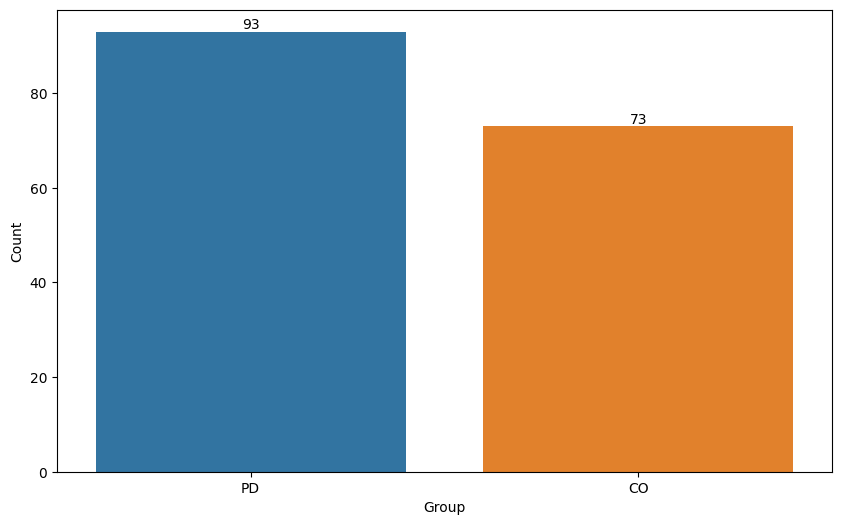

In [21]:
group_counts = df['Group'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.xlabel('Group')
plt.ylabel('Count')

# Display the exact value on top of each bar
for i, count in enumerate(group_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


# Display the distribution of the genders (Male of Female)

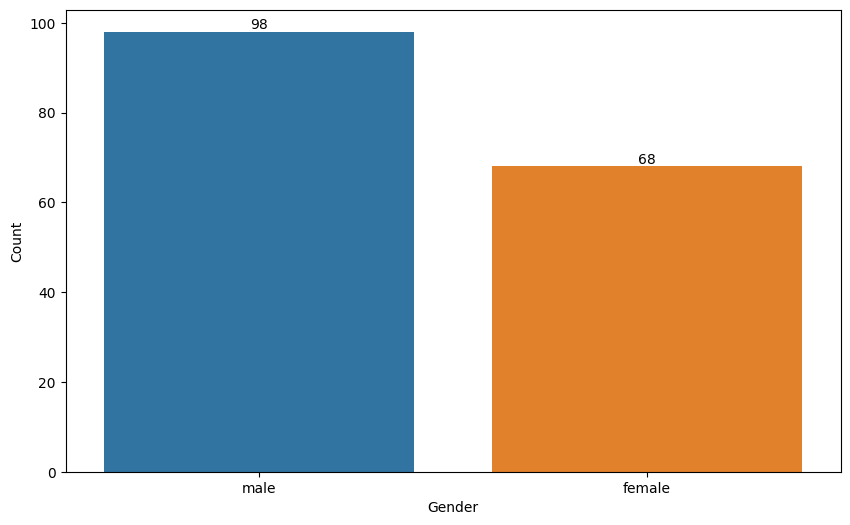

In [20]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the exact value on top of each bar
for i, count in enumerate(gender_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


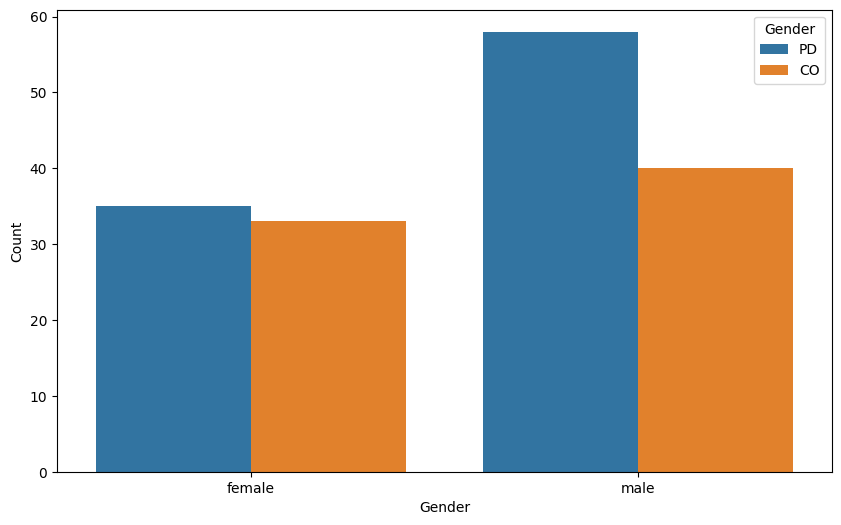

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Group', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right')
plt.show()


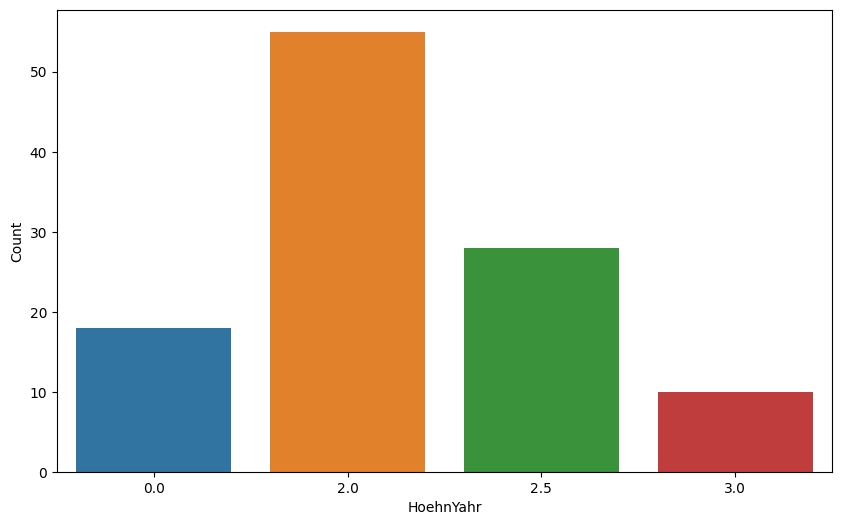

In [17]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HoehnYahr')
plt.xlabel('HoehnYahr')
plt.ylabel('Count')
plt.show()


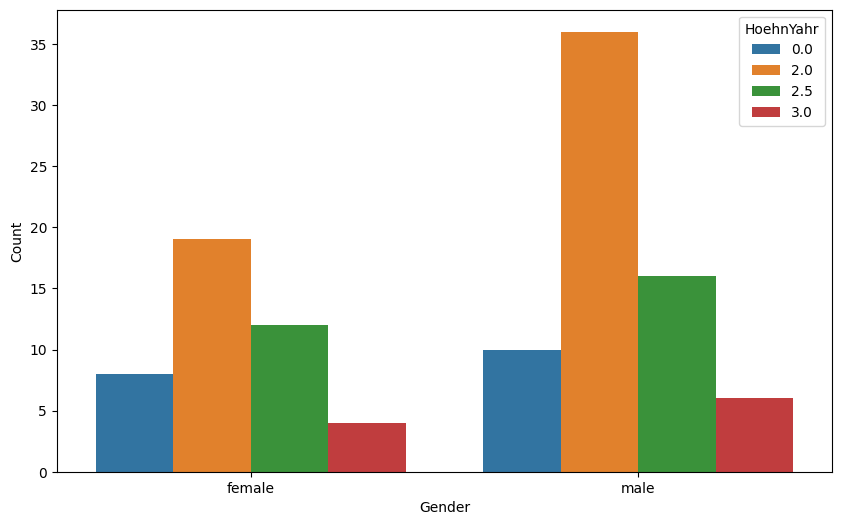

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='HoehnYahr', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='HoehnYahr', loc='upper right')
plt.show()

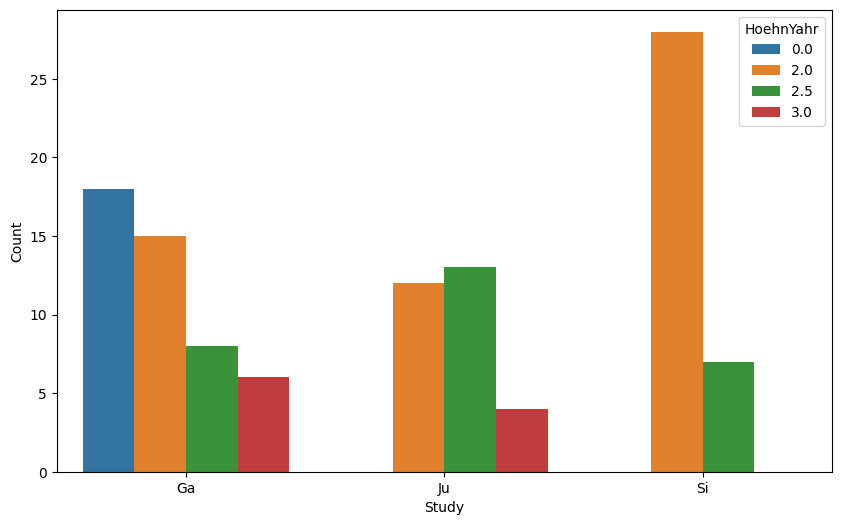

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Study', hue='HoehnYahr', data=df)
plt.xlabel('Study')
plt.ylabel('Count')
plt.legend(title='HoehnYahr', loc='upper right')
plt.show()

# Analysing and visualising the continual data

## general statistics

In [10]:
# Select the columns of interest
columns_of_interest = ["Height (meters)", "Weight (kg)", "HoehnYahr", "UPDRS", "UPDRSM", "TUAG", "Speed_01 (m/sec)", "Speed_10"]

# Subset the dataframe with the selected columns
df_subset = df[columns_of_interest]

# Summary statistics
summary_stats = df_subset.describe()

summary_stats

Height (meters)  Weight (kg)   HoehnYahr       UPDRS      UPDRSM  \
count       166.000000   166.000000  166.000000  166.000000  166.000000   
mean         57.634233    72.558282    1.927711   21.466667   13.177778   
std          78.070619    11.985394    0.730846   15.835442    9.797258   
min           1.450000    47.000000    0.000000    0.000000    0.000000   
25%           1.660000    64.250000    2.000000    3.000000    3.000000   
50%           1.740000    72.000000    2.000000   21.466667   13.177778   
75%         160.000000    80.000000    2.000000   32.000000   19.000000   
max         185.000000   105.000000    3.000000   70.000000   44.000000   

             TUAG  Speed_01 (m/sec)    Speed_10  
count  166.000000        166.000000  166.000000  
mean    10.918235          1.125345    0.967450  
std      3.336956          0.213165    0.104178  
min      6.230000          0.360000    0.228000  
25%      9.107500          1.015000    0.967450  
50%     10.475000          1.143500    0.967450  
75%     11.612500          1.260500    0.967450  
max     36.340000          1.542000    1.532000

## Histograms

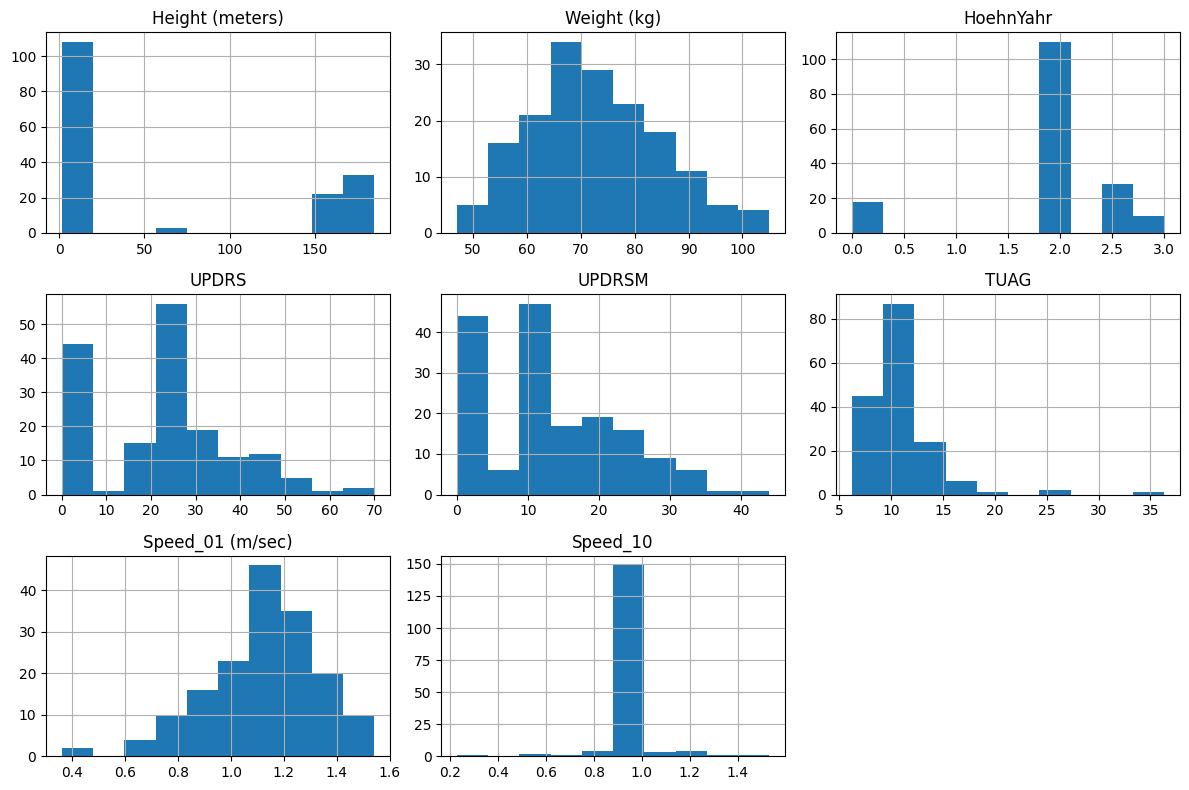

In [29]:
df_subset.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## Box plots

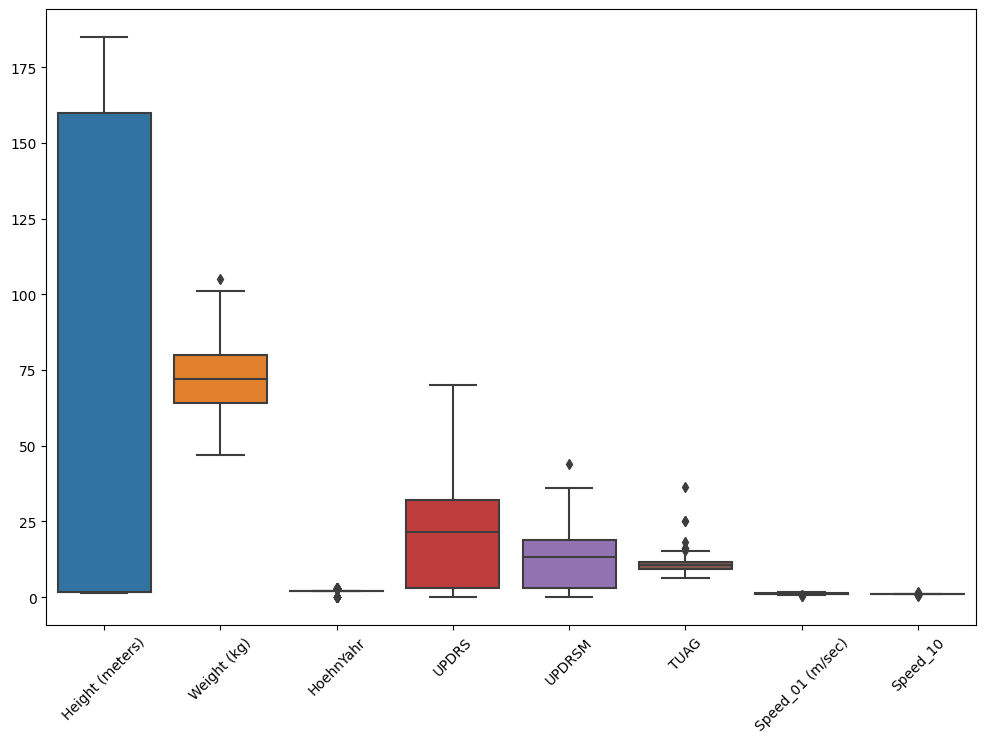

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_subset)
plt.xticks(rotation=45)
plt.show()

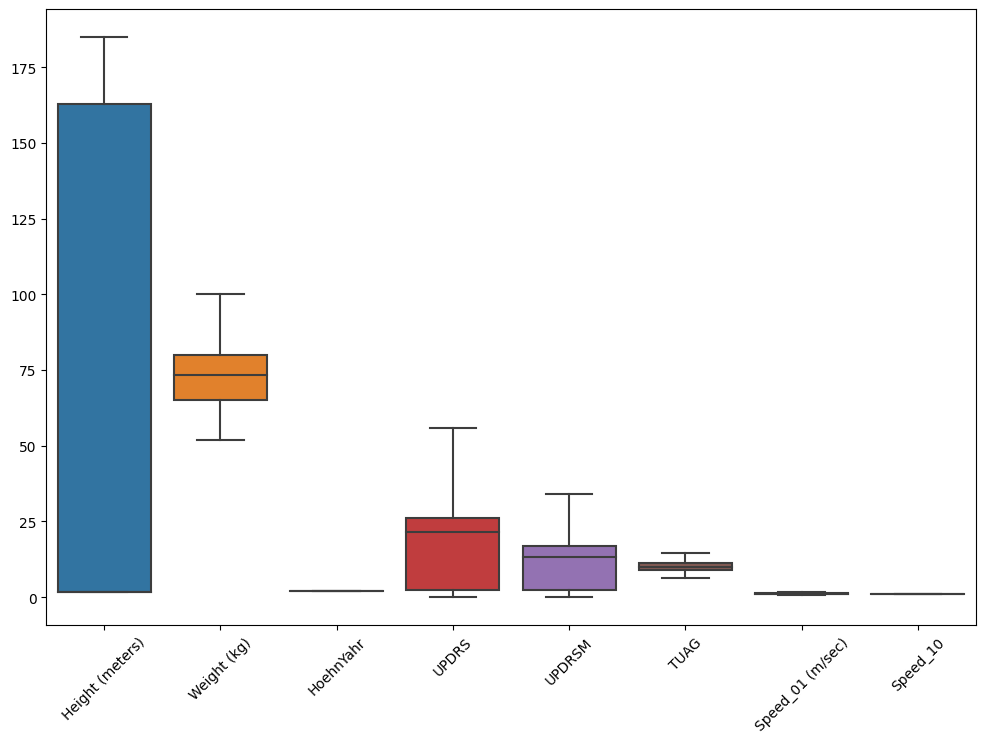

In [16]:
# get q1, q3 and interquartile range for each column
q1 = df_subset.quantile(0.25)
q3 = df_subset.quantile(0.75)

iqrs = q3 - q1

# filter out outliers by keeping only rows where each column is within the range
df_subset = df_subset[~((df_subset < (q1 - 1.5 * iqrs)) | (df_subset > (q3 + 1.5 * iqrs))).any(axis=1)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_subset)
plt.xticks(rotation=45)
plt.show()

## Correlation matrix

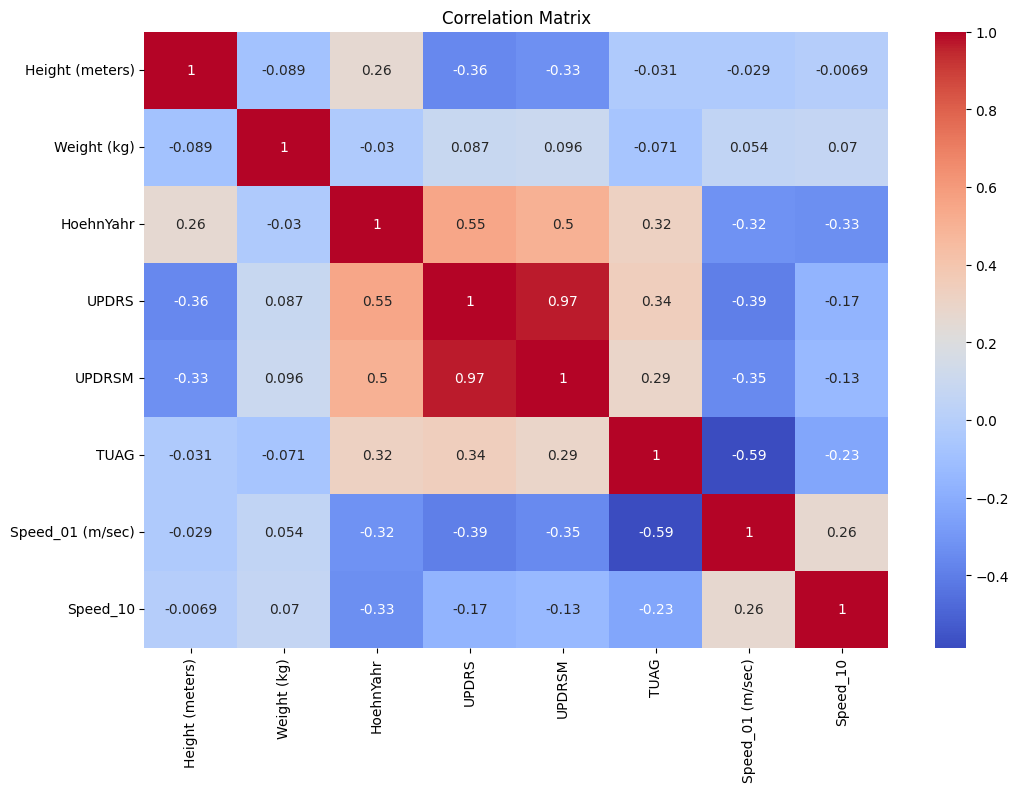

In [31]:
corr_matrix = df_subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Import walking data of a patient 

In [19]:
# read txt file with pandas
df_p1 = pd.read_csv('gait-in-parkinsons-disease-1.0.0\GaCo01_01.txt', sep='\t', header=None)

# rename columns
df_p1.columns = ['time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'L', 'R']

df_p1.head()

time     L1     L2     L3     L4     L5     L6     L7     L8     R1     R2  \
0  0.00  199.1  87.34  91.08  24.09  21.12  87.67  87.23  64.57  163.9  79.86   
1  0.01  199.1  87.34  91.08  24.09  21.12  87.67  87.23  64.57  163.9  79.86   
2  0.02  199.1  87.34  91.08  24.09  21.12  87.67  87.23  62.59  163.9  79.86   
3  0.03  199.1  87.34  91.08  24.09  21.12  87.67  89.10  64.57  163.9  77.55   
4  0.04  199.1  87.34  91.08  24.09  21.12  87.67  87.23  62.59  163.9  77.55   

       R3     R4     R5      R6      R7     R8       L       R  
0  112.42  50.82  13.75  102.74  144.98  79.53  662.20  748.00  
1  112.42  50.82  13.75  102.74  144.98  79.53  662.20  748.00  
2  112.42  50.82  13.75  102.74  144.98  79.53  660.22  748.00  
3  112.42  48.07  13.75  105.49  144.98  79.53  664.07  745.69  
4  112.42  50.82  13.75  105.49  144.98  79.53  660.22  748.44

# visualise the data

## Sensors of the left foot

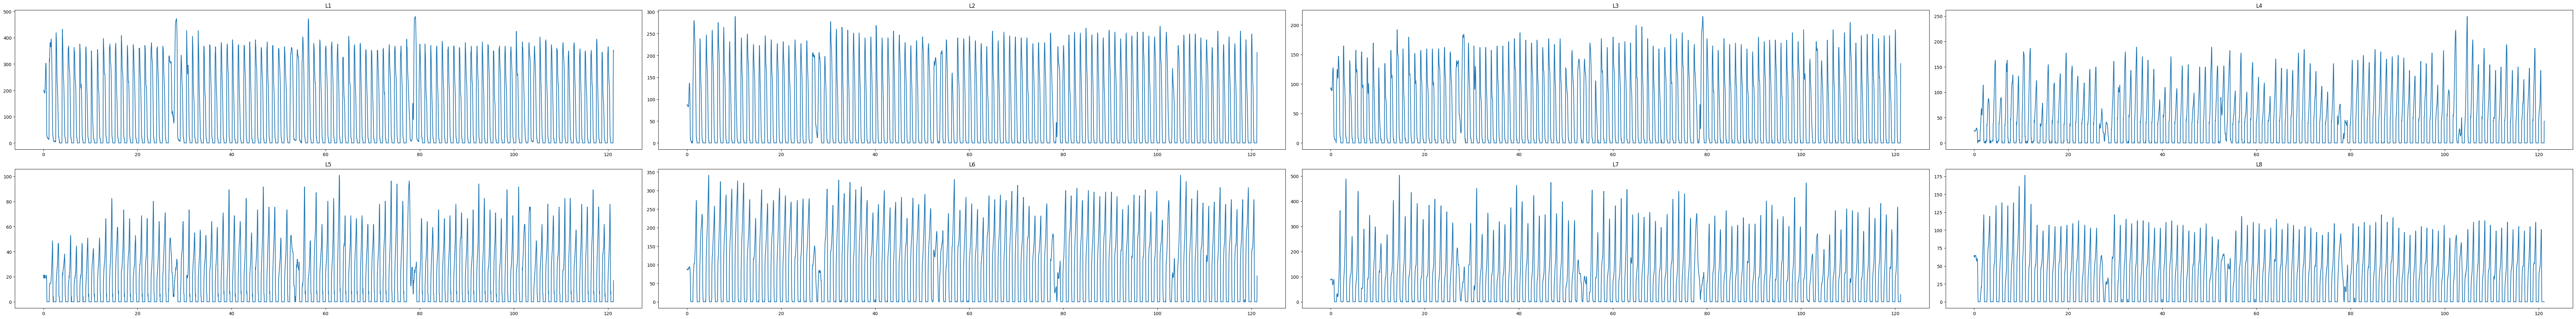

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(80, 10))

# Plot each column in the subplot grid
for i, col in enumerate(df_p1.columns[1:9]):
    ax = axes[i // 4, i % 4]
    ax.plot(df_p1['time'], df_p1[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()


## Sensors of the right foot

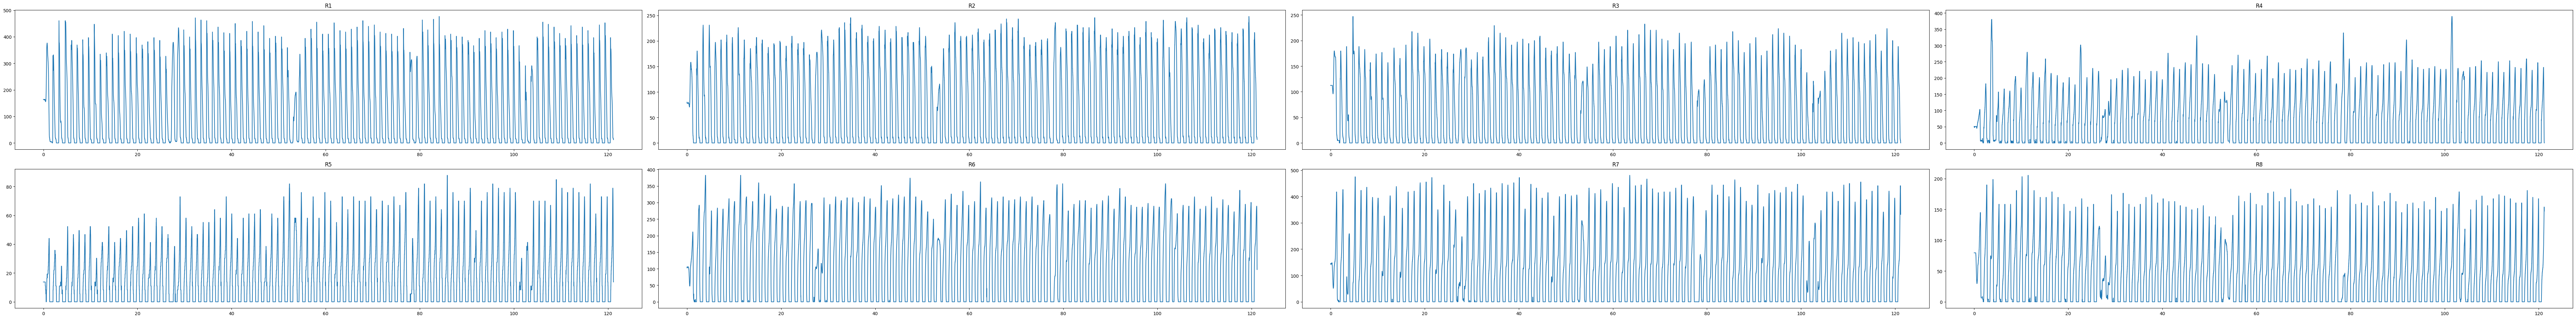

In [34]:
fig, axes = plt.subplots(2, 4, figsize=(80, 10))

# Plot each column in the subplot grid
for i, col in enumerate(df_p1.columns[9:17]):
    ax = axes[i // 4, i % 4]
    ax.plot(df_p1['time'], df_p1[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

## Sum of the sensors of the left foot

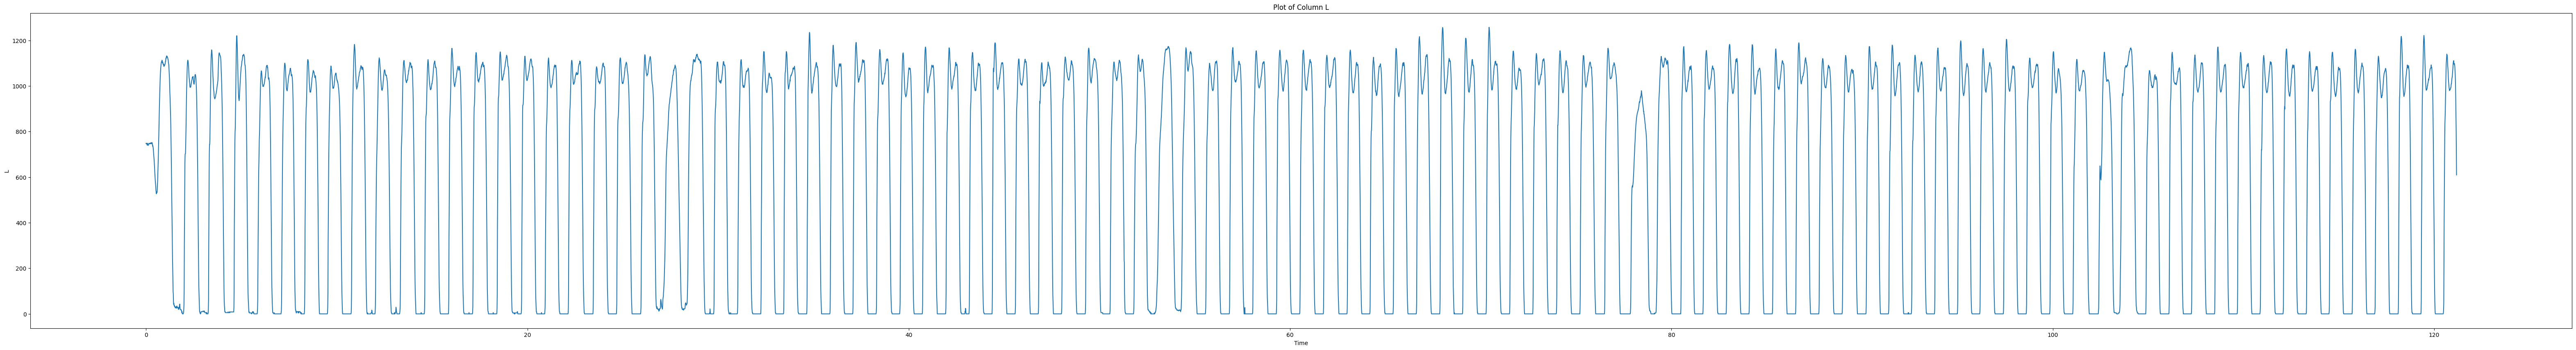

In [35]:
plt.figure(figsize=(80, 10))
plt.plot(df_p1['time'], df_p1['R'])
plt.xlabel('Time')
plt.ylabel('L')
plt.title('Plot of Column L')
plt.show()

## Sum of the sensors of the right foot

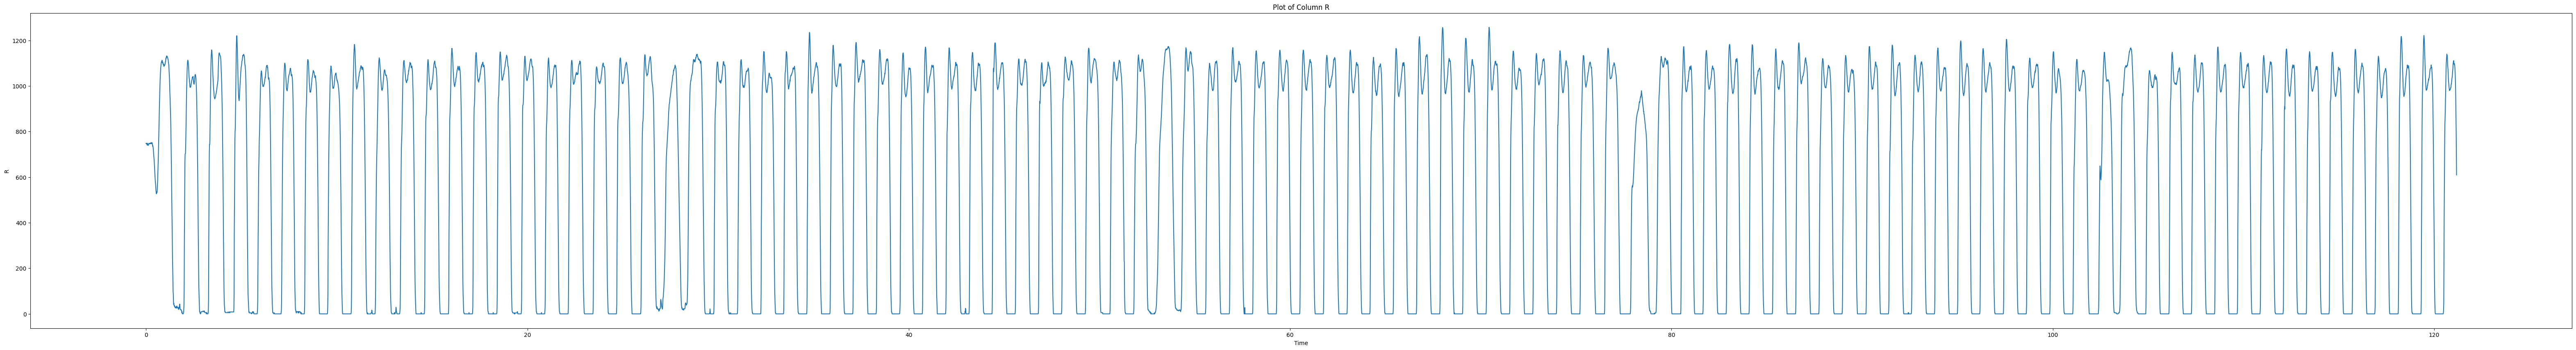

In [36]:
plt.figure(figsize=(80, 10))
plt.plot(df_p1['time'], df_p1['R'])
plt.xlabel('Time')
plt.ylabel('R')
plt.title('Plot of Column R')
plt.show()


# Apply FFT to see data distribution

## Sensors of the left foot

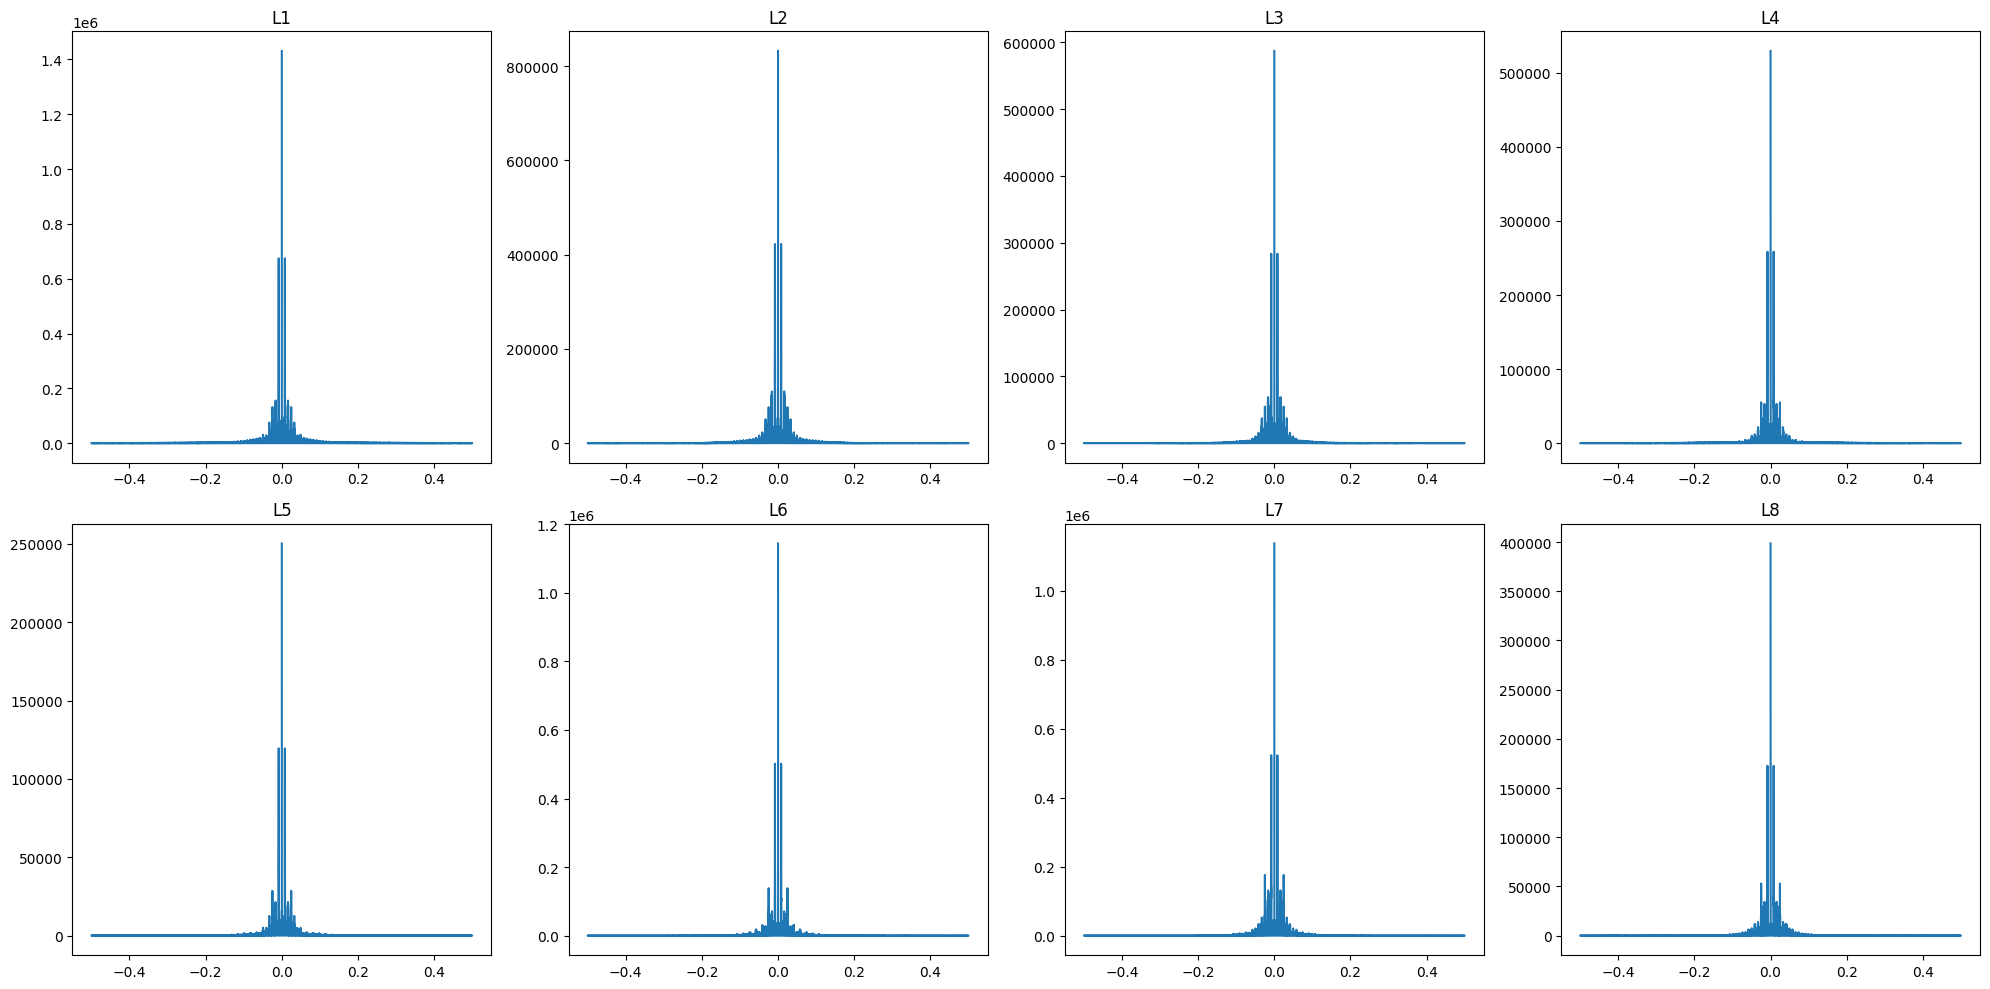

In [23]:
# Apply FFT on each column
fft_data = np.fft.fft(df_p1.iloc[:, 1:], axis=0)

# Get the frequencies
frequencies = np.fft.fftfreq(len(df_p1), d=1)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot each column in the subplot grid
for i, col in enumerate(df_p1.columns[1:9]):
    ax = axes[i // 4, i % 4]
    ax.plot(frequencies, np.abs(fft_data[:, i]))
    ax.set_title(col)

plt.tight_layout()
plt.show()

## Sensors of the right foot

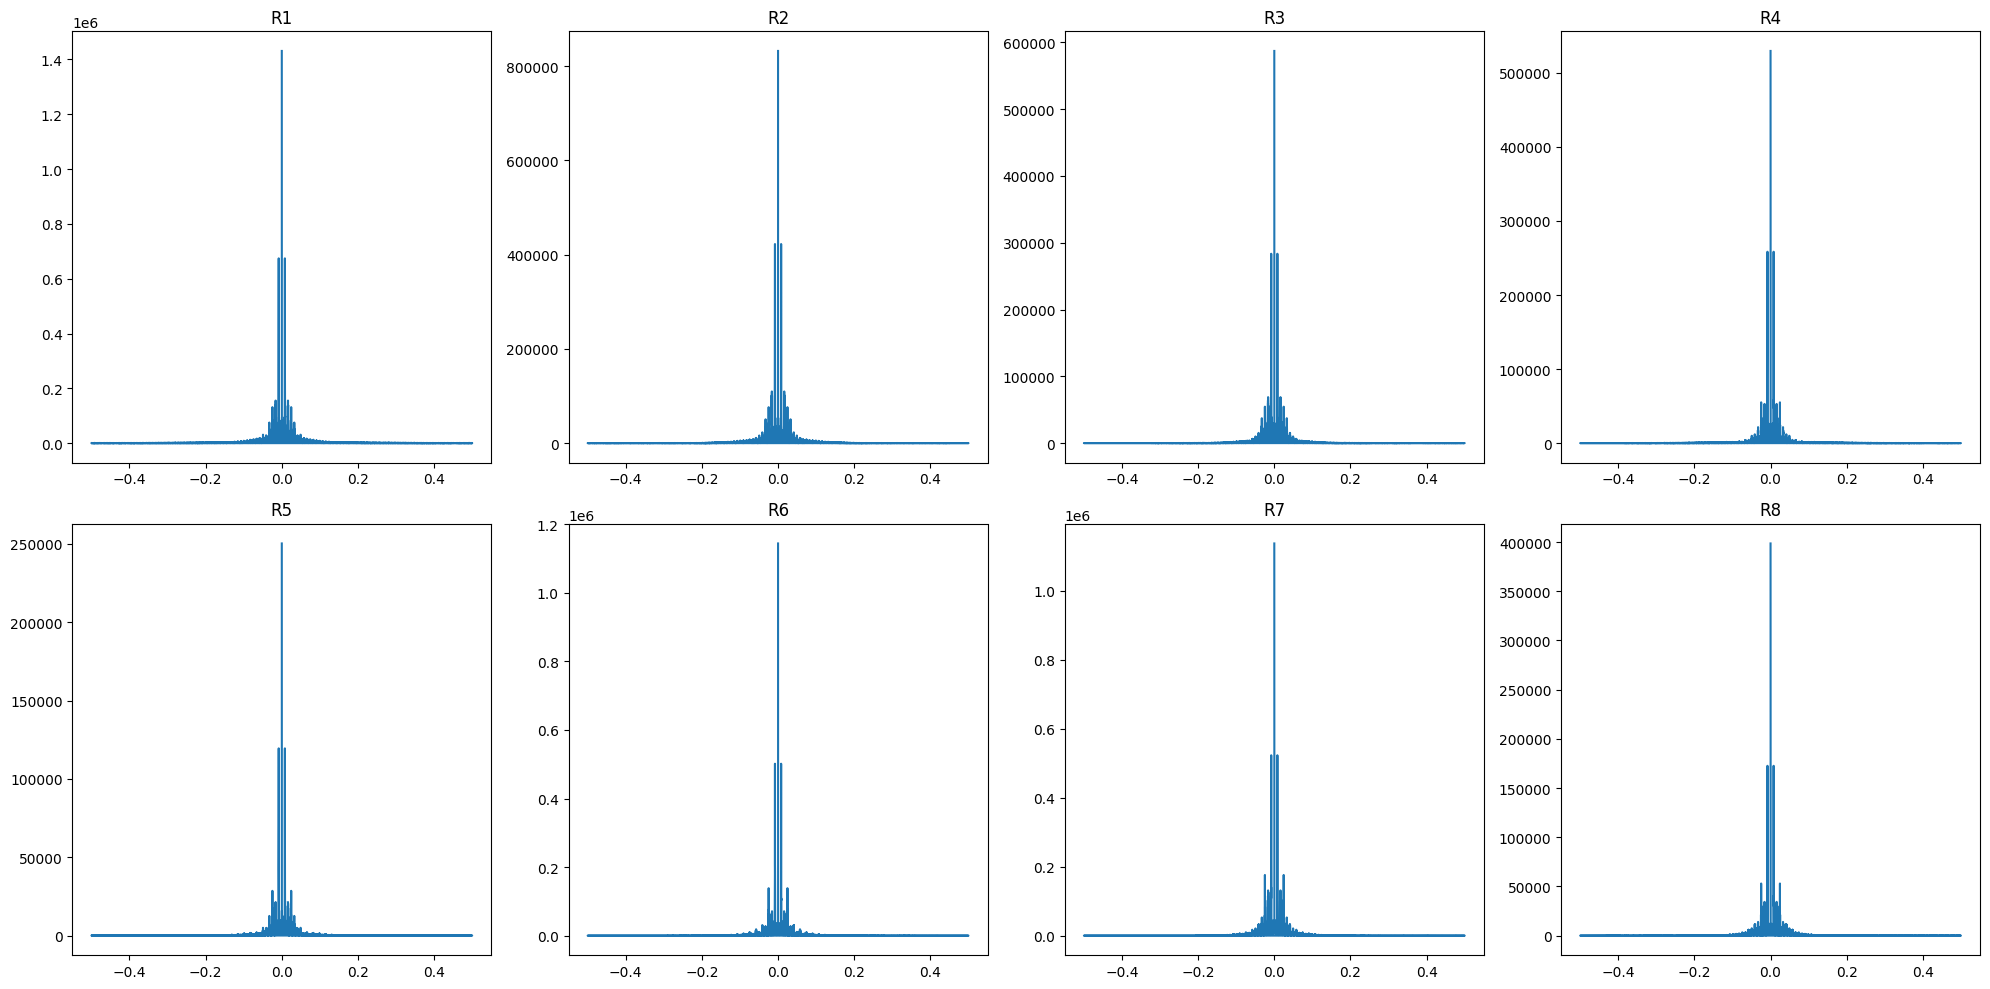

In [38]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot each column in the subplot grid
for i, col in enumerate(df_p1.columns[9:17]):
    ax = axes[i // 4, i % 4]
    ax.plot(frequencies, np.abs(fft_data[:, i]))
    ax.set_title(col)

plt.tight_layout()
plt.show()

## Sum of the left and right foot

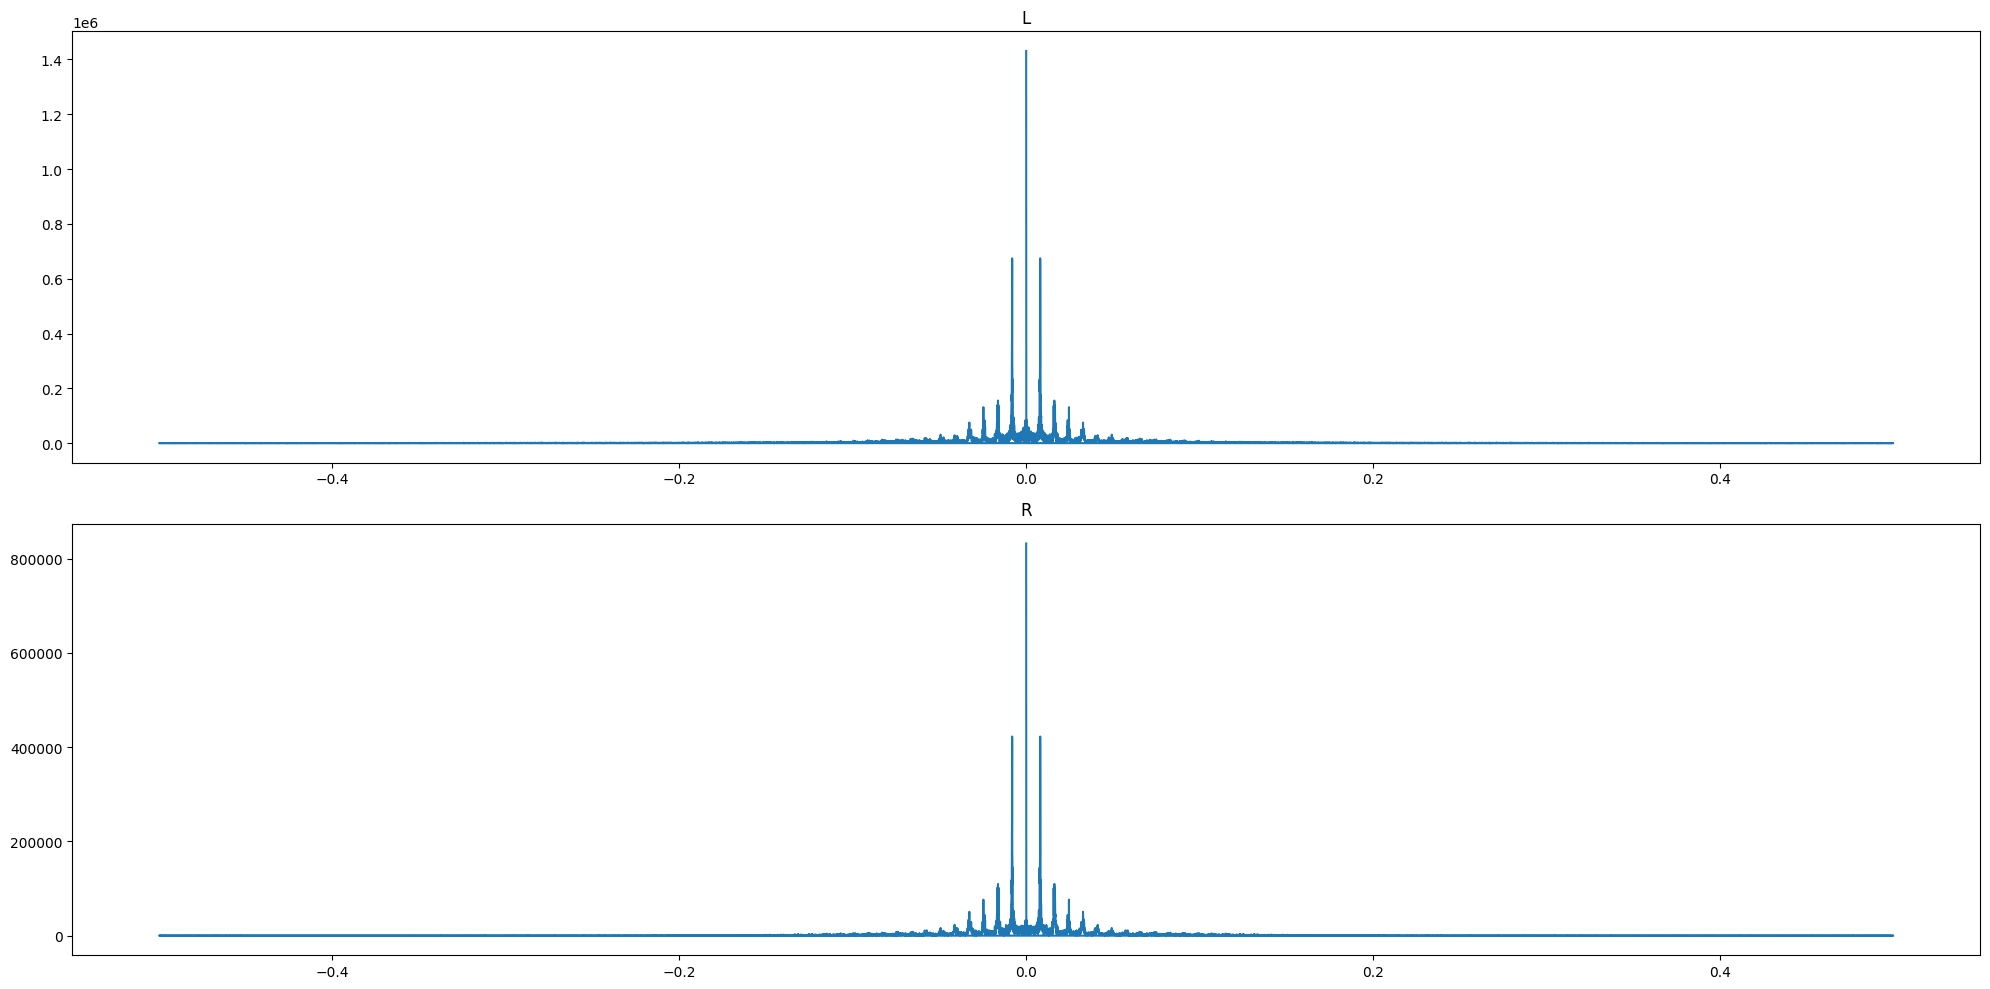

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# Plot each column in the subplot grid
for i, col in enumerate(df_p1.columns[17:]):
    ax = axes[i]
    ax.plot(frequencies, np.abs(fft_data[:, i]))
    ax.set_title(col)

plt.tight_layout()
plt.show()

# Spectrogram for time-frequency analysis

## Sensors of the left foot

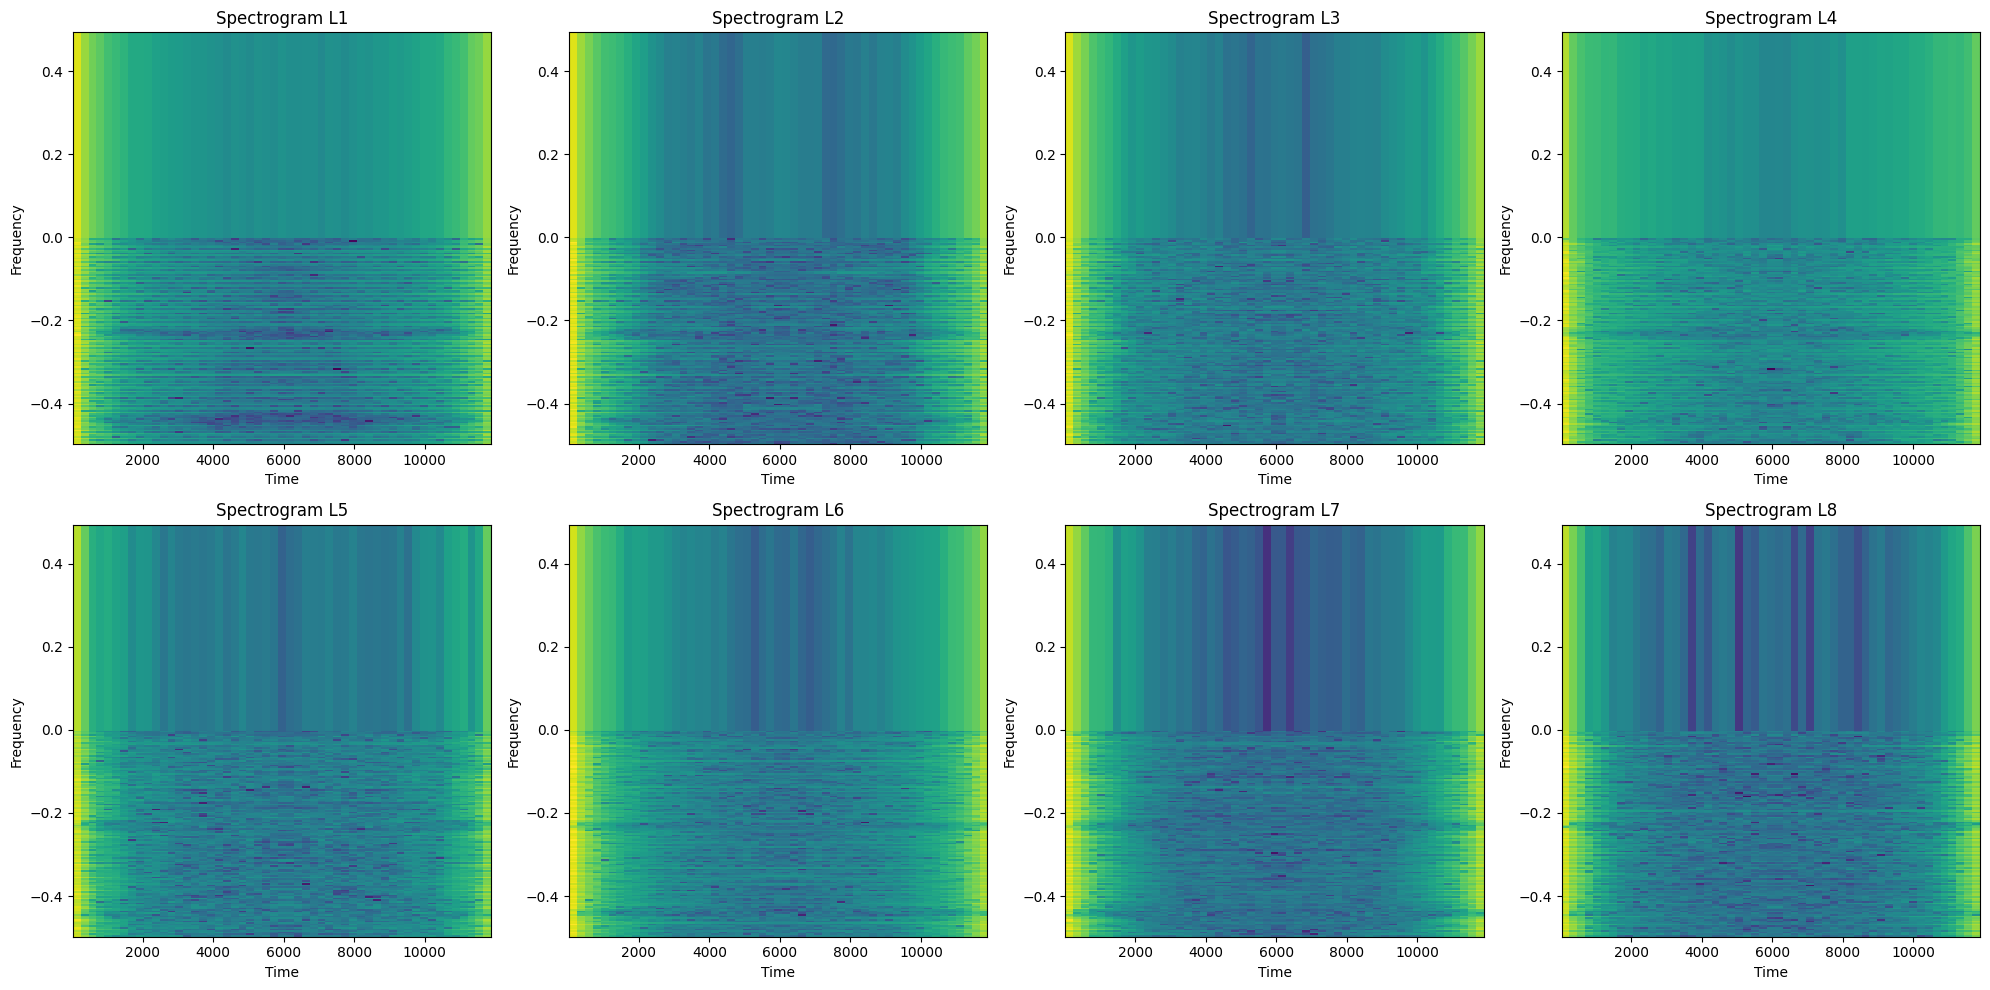

In [54]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot each column in the subplot grid
for i, col in enumerate(df_p1.columns[1:9]):
    ax = axes[i // 4, i % 4]
    f, t, Sxx = spectrogram(fft_data[:, i])
    ax.pcolormesh(t, f, 10 * np.log10(Sxx))
    ax.set_title('Spectrogram '+col)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Sensors of the right foot

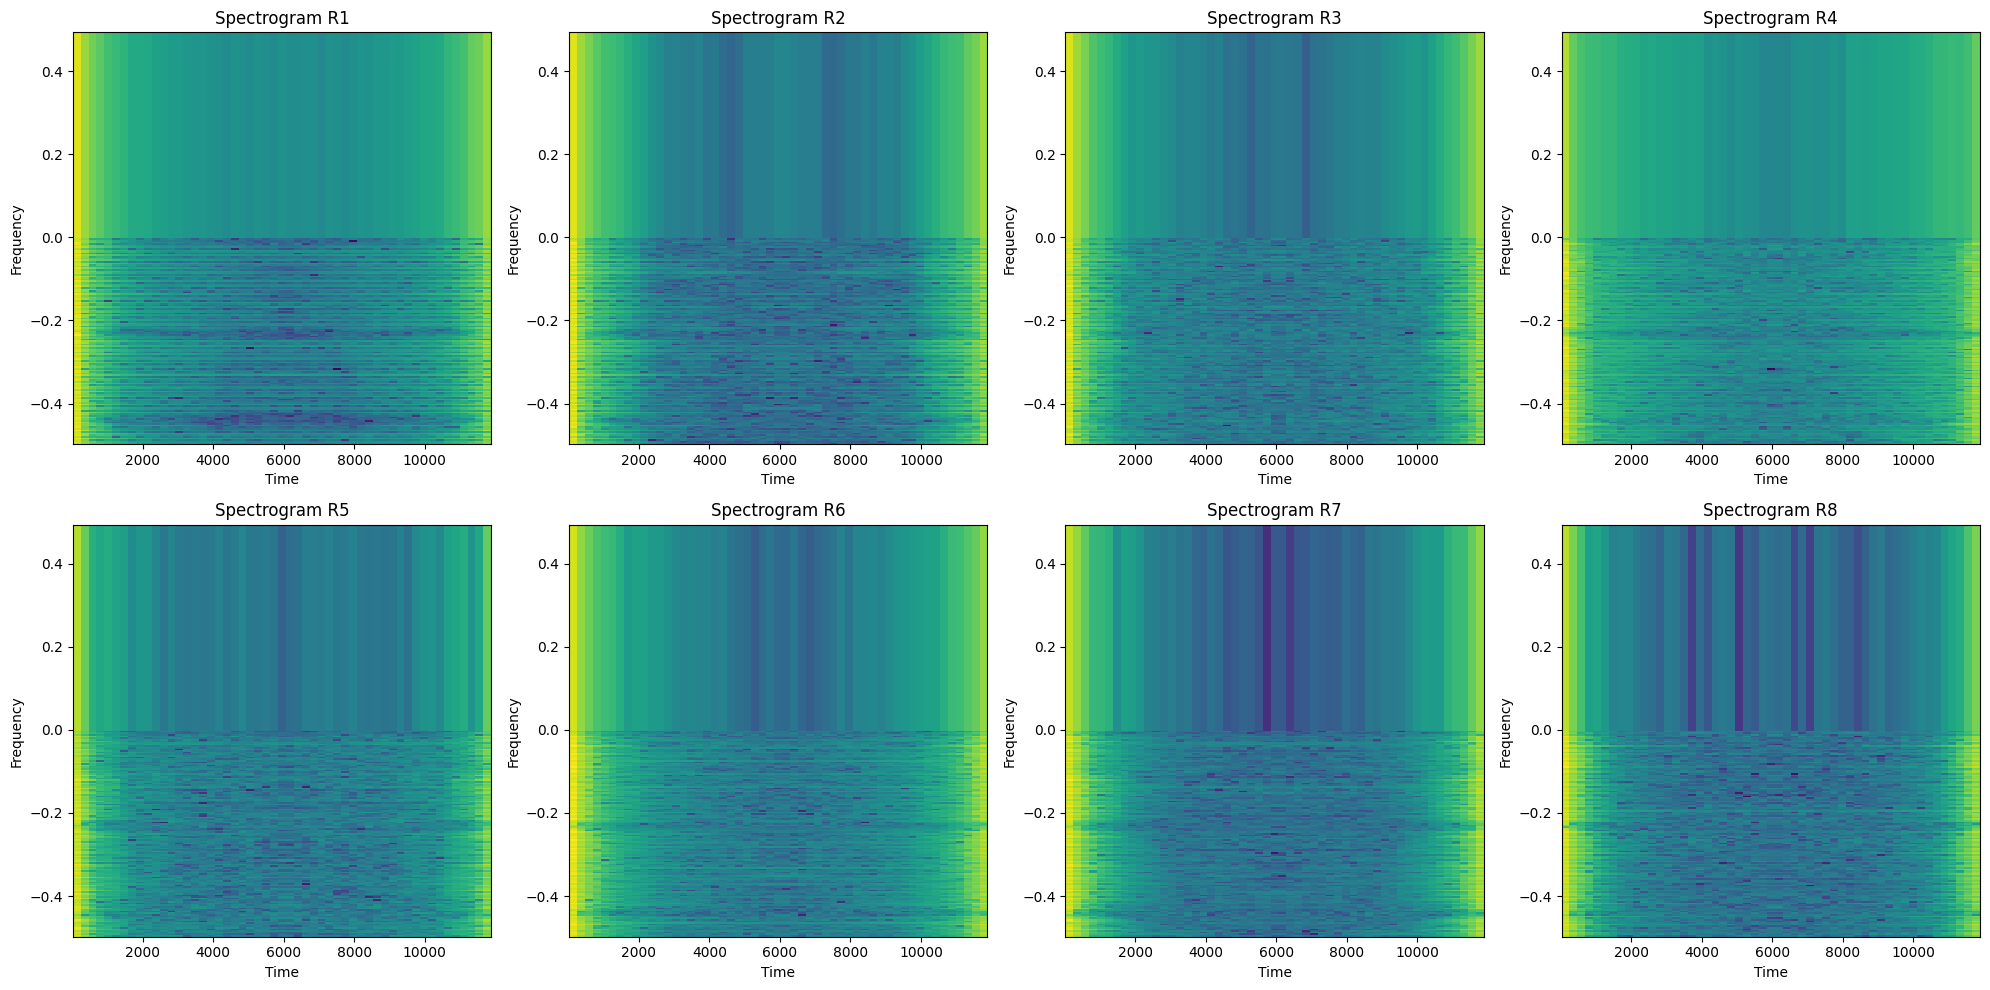

In [53]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot each column in the subplot grid
for i, col in enumerate(df_p1.columns[9:17]):
    ax = axes[i // 4, i % 4]
    f, t, Sxx = spectrogram(fft_data[:, i])
    ax.pcolormesh(t, f, 10 * np.log10(Sxx))
    ax.set_title('Spectrogram '+col)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Sum of the left and right foot

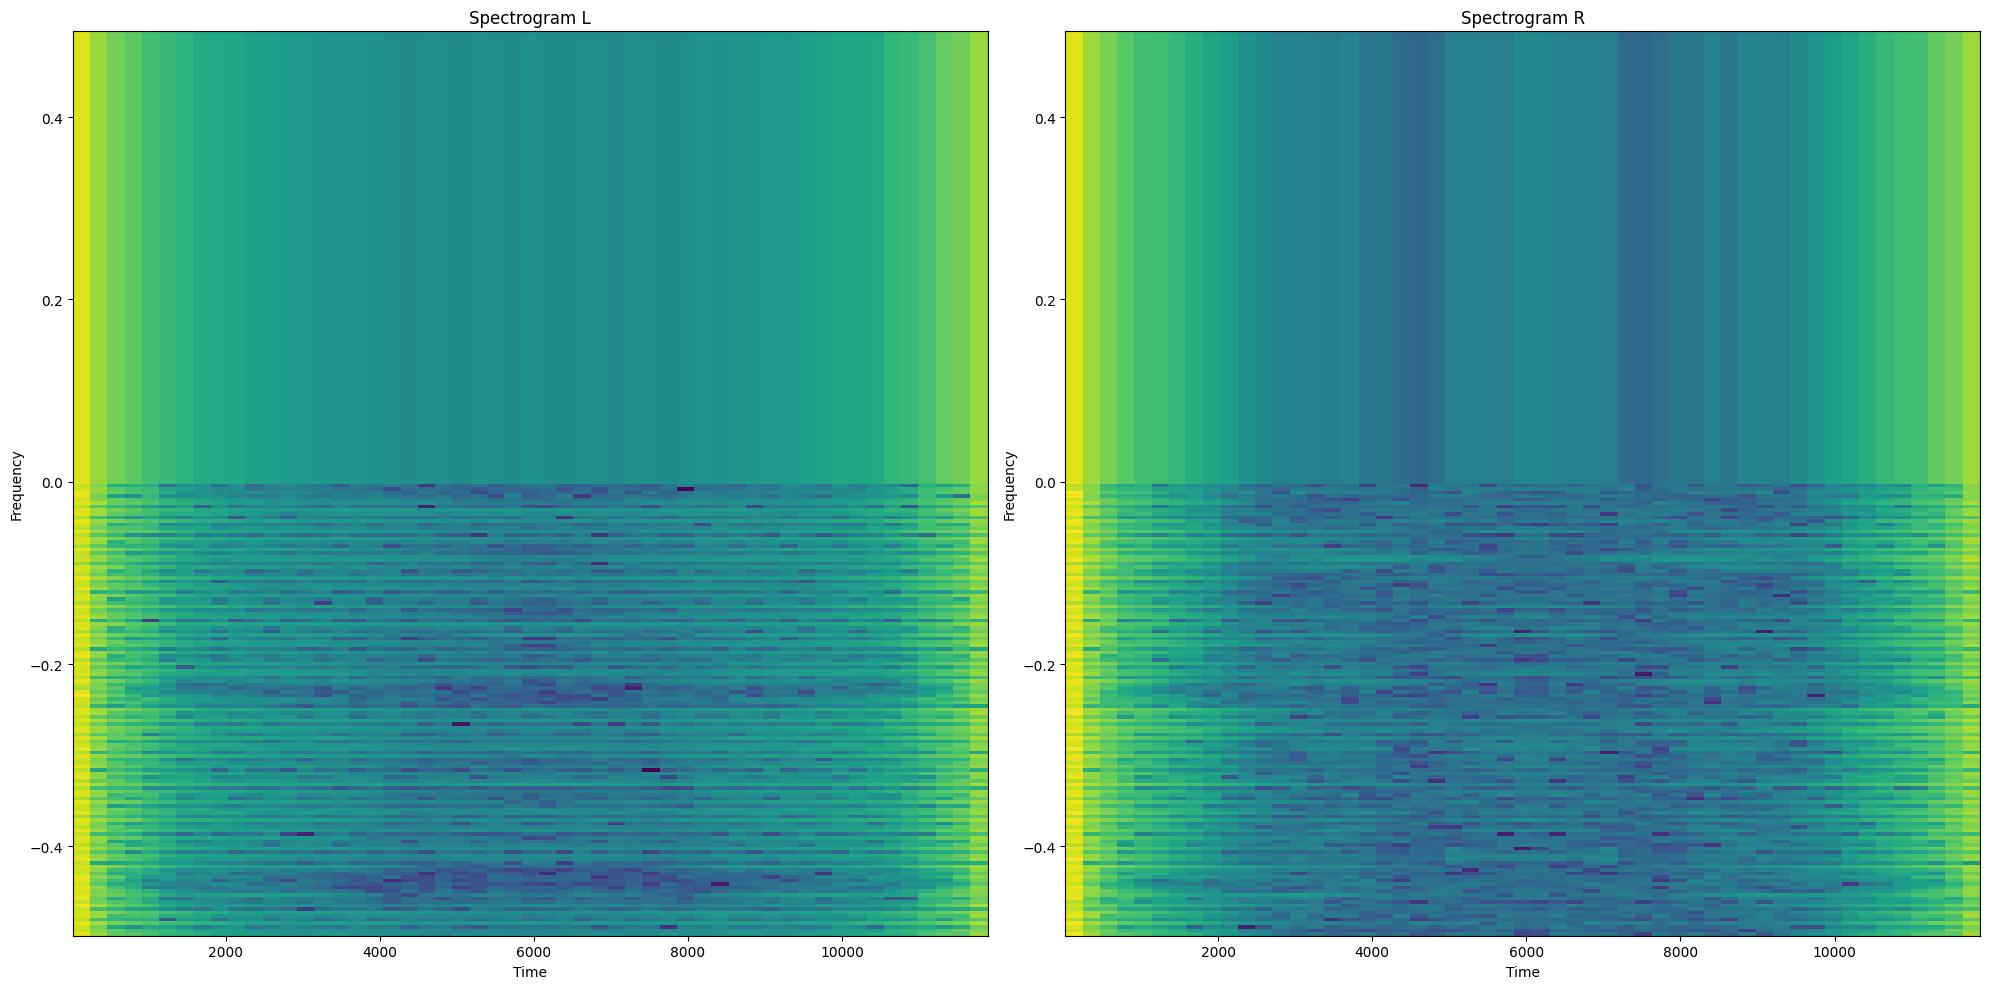

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot each column in the subplot grid
for i, col in enumerate(df_p1.columns[17:]):
    ax = axes[i]
    f, t, Sxx = spectrogram(fft_data[:, i])
    ax.pcolormesh(t, f, 10 * np.log10(Sxx))
    ax.set_title('Spectrogram '+col)
    ax.set_xlabel('Time')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()